In [ ]:
'''
About this file

rev_util: Razão de uso de crédito por crédito disponível
Revolving Utilization of Unsecured Lines – The ratio of the total balance on revolving credit lines (e.g., credit cards) to the total credit limit on those accounts. This metric indicates how much of their available credit a borrower is using.

age:
Age – The borrower's age in years.

late_30_59:
Number of Times 30-59 Days Past Due – The number of times the borrower has been 30 to 59 days late on a payment but not worse. This helps assess short-term delinquency behavior.

debt_ratio:
Debt Ratio – The proportion of monthly debt payments (including loans, alimony, etc.) to monthly gross income. It reflects the borrower's overall debt burden.

monthly_inc:
Monthly Income – The gross monthly income of the borrower.

open_credit:
Number of Open Credit Lines and Loans – The total number of open loans (installment loans) and revolving credit lines (e.g., credit cards) the borrower has.

late_90:
Number of Times 90 Days Late – The number of times the borrower has been 90 days or more late on a payment. This indicates severe delinquency issues.

real_estate: # de Hipotecas
Number of Real Estate Loans or Lines – The number of mortgage or real estate-related loans the borrower has, including home equity lines of credit.

late_60_89:
Number of Times 60-89 Days Past Due – The number of times the borrower has been 60 to 89 days late on a payment but not worse. This helps assess mid-term delinquency behavior.

dependents:
Number of Dependents – The number of individuals who rely on the borrower for financial support, excluding themselves (e.g., children, spouse).

dlq_2yrs:
Serious Delinquency in 2 Years – The target variable indicating whether the borrower experienced a serious delinquency (90 days or more past due) within the next two years. A value of 1 indicates a delinquency; 0 indicates none.


'''

In [94]:
%matplotlib inline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from pandas.plotting import scatter_matrix
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Visualização dos Dados

In [73]:
path = os.getcwd() #Caminho da pasta desse código, que DEVE ser a mesma dos arquivos
arquivos = [csv for csv in os.listdir(path = path) if csv.endswith('csv')] # caminhos dos arquivos de format .csv
dados = [pd.read_csv(arquivos[i], encoding = 'utf-8') for i in range(len(arquivos))]
dados_risk = dados[0]
attributes = list(dados_risk.columns[:-1])
x = dados_risk.iloc[:, :-1]
y = dados_risk.iloc[:, -1]

In [74]:
display(dados_risk)

,rev_util,age,late_30_59,debt_ratio,monthly_inc,open_credit,late_90,real_estate,late_60_89,dependents,dlq_2yrs
0,0.006999,38.0,0.0,0.302150,5440.0,4.0,0.0,1.0,0.0,3.0,0
1,0.704592,63.0,0.0,0.471441,8000.0,9.0,0.0,1.0,0.0,0.0,0
2,0.063113,57.0,0.0,0.068586,5000.0,17.0,0.0,0.0,0.0,0.0,0
3,0.368397,68.0,0.0,0.296273,6250.0,16.0,0.0,2.0,0.0,0.0,0
4,1.000000,34.0,1.0,0.000000,3500.0,0.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...
16709,1.000000,46.0,0.0,170.398010,401.0,3.0,2.0,0.0,0.0,2.0,1
16710,1.135552,41.0,2.0,0.845887,7500.0,12.0,0.0,4.0,1.0,0.0,1
16711,0.920107,31.0,1.0,0.176732,1125.0,4.0,1.0,0.0,0.0,0.0,1
16712,0.983825,55.0,0.0,0.064116,4600.0,2.0,1.0,0.0,0.0,6.0,1


In [52]:
for column in dados_risk.columns:
    print(column, dados_risk[column].isna().sum())

dados_risk.info()
dados_risk.describe()
dados_risk[dados_risk.columns[-1]].sum(0)

rev_util 0
age 0
late_30_59 0
debt_ratio 0
monthly_inc 0
open_credit 0
late_90 0
real_estate 0
late_60_89 0
dependents 0
dlq_2yrs 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16714 entries, 0 to 16713
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rev_util     16714 non-null  float64
 1   age          16714 non-null  float64
 2   late_30_59   16714 non-null  float64
 3   debt_ratio   16714 non-null  float64
 4   monthly_inc  16714 non-null  float64
 5   open_credit  16714 non-null  float64
 6   late_90      16714 non-null  float64
 7   real_estate  16714 non-null  float64
 8   late_60_89   16714 non-null  float64
 9   dependents   16714 non-null  float64
 10  dlq_2yrs     16714 non-null  int64  
dtypes: float64(10), int64(1)
memory usage: 1.4 MB


8357

In [132]:
for column in dados_risk.columns:
    display(dados_risk[column].value_counts())

rev_util
1.000000    1861
0.000000     879
1.003322       4
1.000000       4
0.920266       3
            ... 
0.021864       1
0.456877       1
0.100856       1
0.101500       1
0.224711       1
Name: count, Length: 13887, dtype: int64

age
49.0     500
46.0     479
48.0     468
50.0     455
47.0     453
        ... 
99.0       2
92.0       2
95.0       1
98.0       1
101.0      1
Name: count, Length: 78, dtype: int64

late_30_59
0.0     11346
1.0      2873
2.0      1253
3.0       597
4.0       304
5.0       140
98.0       86
6.0        69
7.0        25
8.0         8
9.0         4
10.0        3
96.0        3
12.0        1
13.0        1
11.0        1
Name: count, dtype: int64

debt_ratio
0.000000       405
1.000000         5
0.003599         3
0.324150         3
0.355329         3
              ... 
0.124245         1
1729.000000      1
0.185136         1
0.338357         1
0.057235         1
Name: count, Length: 16128, dtype: int64

monthly_inc
5000.0    342
4000.0    313
3000.0    285
6000.0    249
2500.0    224
         ... 
6123.0      1
5611.0      1
4534.0      1
3977.0      1
401.0       1
Name: count, Length: 5150, dtype: int64

open_credit
6.0     1439
7.0     1425
5.0     1411
8.0     1268
9.0     1255
4.0     1170
10.0    1034
3.0     1018
11.0     896
12.0     805
2.0      751
13.0     623
1.0      589
14.0     524
15.0     453
0.0      367
16.0     355
17.0     294
18.0     224
20.0     175
19.0     153
21.0     108
22.0      85
23.0      68
24.0      49
25.0      33
26.0      29
27.0      26
28.0      19
29.0      15
30.0      12
33.0       8
31.0       8
32.0       6
36.0       3
35.0       2
40.0       2
48.0       2
47.0       1
49.0       1
57.0       1
43.0       1
37.0       1
45.0       1
52.0       1
41.0       1
46.0       1
39.0       1
Name: count, dtype: int64

late_90
0.0     13626
1.0      1667
2.0       675
3.0       327
4.0       169
98.0       86
5.0        67
6.0        38
7.0        22
9.0        11
8.0        10
10.0        5
96.0        3
11.0        3
13.0        2
17.0        1
14.0        1
12.0        1
Name: count, dtype: int64

real_estate
0.0     6622
1.0     5323
2.0     3447
3.0      755
4.0      294
5.0      111
6.0       64
7.0       35
8.0       23
9.0       15
12.0       6
10.0       5
13.0       5
11.0       2
15.0       2
20.0       1
25.0       1
17.0       1
29.0       1
16.0       1
Name: count, dtype: int64

late_60_89
0.0     14200
1.0      1691
2.0       485
3.0       161
98.0       86
4.0        53
5.0        18
6.0        12
7.0         3
96.0        3
11.0        1
8.0         1
Name: count, dtype: int64

dependents
0.0    8474
1.0    3552
2.0    2685
3.0    1379
4.0     461
5.0     115
6.0      34
7.0      10
8.0       4
Name: count, dtype: int64

dlq_2yrs
0    8357
1    8357
Name: count, dtype: int64

In [125]:
#Especificações gráficas
plt.rc("font", family = "sans-serif", weight = "light", size = 9);
plt.rc("lines", lw = 1, color = "r");
plt.rc("axes", edgecolor = "black");
plt.rcParams["axes.spines.top"] = True
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Helvetica', 'Arial', 'sans-serif']

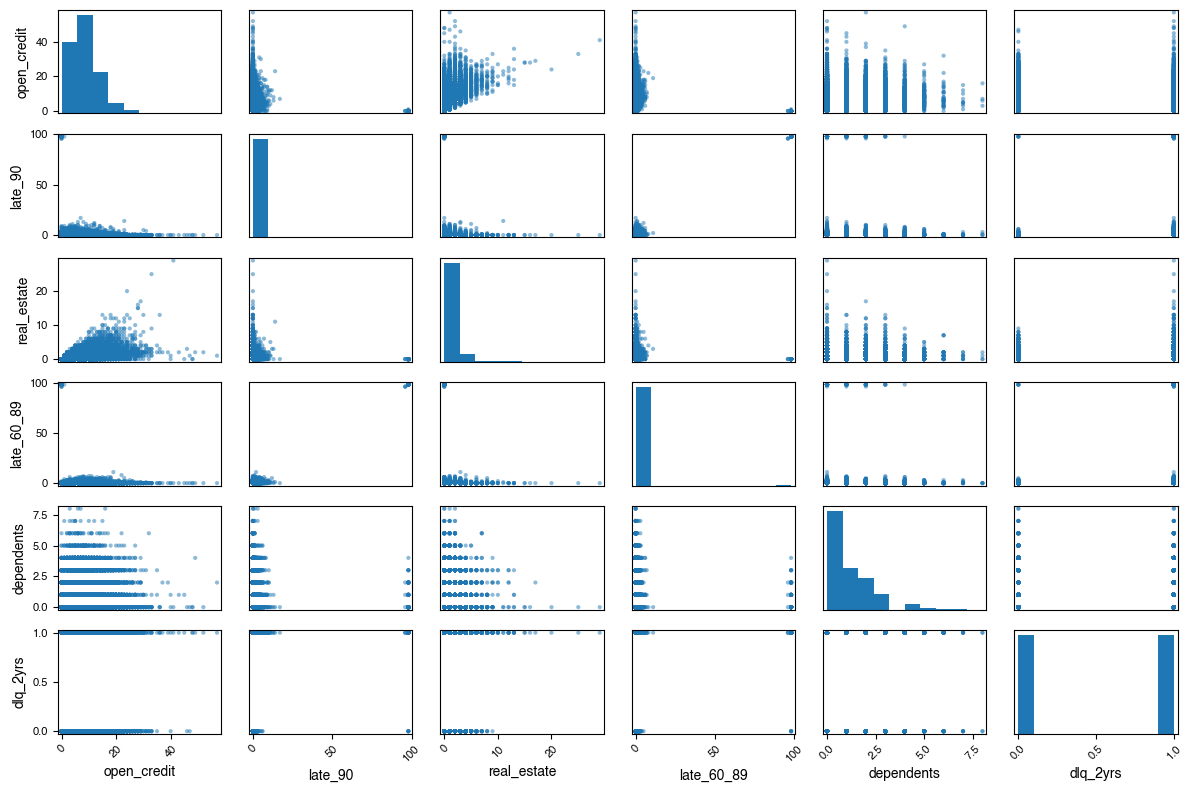

In [129]:
fig = scatter_matrix(dados_risk.iloc[:, 5:], figsize = (12, 8))

# Personalizando os subplots
for ax in fig.ravel():
    ax.tick_params(axis='x', labelrotation=45, labelsize=8, labelcolor='darkblue')
    ax.tick_params(axis='y', labelrotation=0, labelsize=8, labelcolor='darkblue')

    ax.xaxis.label.set_size(10)
    ax.yaxis.label.set_size(10)
    ax.xaxis.label.set_color('black')
    ax.yaxis.label.set_color('black')

plt.tight_layout()
plt.show()


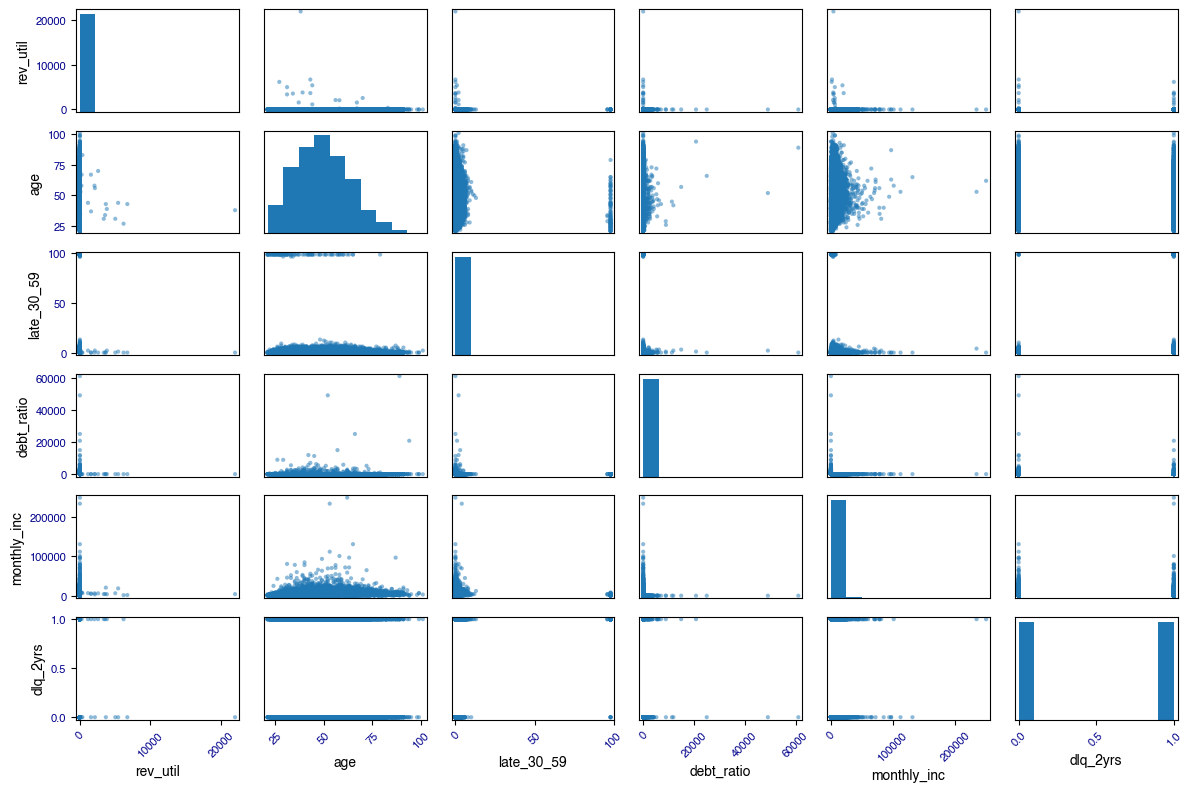

In [128]:
fig = scatter_matrix(dados_risk[['rev_util', 'age', 'late_30_59', 'debt_ratio', 'monthly_inc', 'dlq_2yrs']] , figsize = (12, 8))

# Personalizando os subplots
for ax in fig.ravel():
    ax.tick_params(axis='x', labelrotation=45, labelsize=8, labelcolor='darkblue')
    ax.tick_params(axis='y', labelrotation=0, labelsize=8, labelcolor='darkblue')

    ax.xaxis.label.set_size(10)
    ax.yaxis.label.set_size(10)
    ax.xaxis.label.set_color('black')
    ax.yaxis.label.set_color('black')

plt.tight_layout()
plt.show()

rev_util
1.000000    1861
0.000000     879
1.003322       4
1.000000       4
0.920266       3
            ... 
0.021864       1
0.456877       1
0.100856       1
0.101500       1
0.224711       1
Name: count, Length: 13887, dtype: int64

age
49.0     500
46.0     479
48.0     468
50.0     455
47.0     453
        ... 
99.0       2
92.0       2
95.0       1
98.0       1
101.0      1
Name: count, Length: 78, dtype: int64

late_30_59
0.0     11346
1.0      2873
2.0      1253
3.0       597
4.0       304
5.0       140
98.0       86
6.0        69
7.0        25
8.0         8
9.0         4
10.0        3
96.0        3
12.0        1
13.0        1
11.0        1
Name: count, dtype: int64

debt_ratio
0.000000       405
1.000000         5
0.003599         3
0.324150         3
0.355329         3
              ... 
0.124245         1
1729.000000      1
0.185136         1
0.338357         1
0.057235         1
Name: count, Length: 16128, dtype: int64

monthly_inc
5000.0    342
4000.0    313
3000.0    285
6000.0    249
2500.0    224
         ... 
6123.0      1
5611.0      1
4534.0      1
3977.0      1
401.0       1
Name: count, Length: 5150, dtype: int64

open_credit
6.0     1439
7.0     1425
5.0     1411
8.0     1268
9.0     1255
4.0     1170
10.0    1034
3.0     1018
11.0     896
12.0     805
2.0      751
13.0     623
1.0      589
14.0     524
15.0     453
0.0      367
16.0     355
17.0     294
18.0     224
20.0     175
19.0     153
21.0     108
22.0      85
23.0      68
24.0      49
25.0      33
26.0      29
27.0      26
28.0      19
29.0      15
30.0      12
33.0       8
31.0       8
32.0       6
36.0       3
35.0       2
40.0       2
48.0       2
47.0       1
49.0       1
57.0       1
43.0       1
37.0       1
45.0       1
52.0       1
41.0       1
46.0       1
39.0       1
Name: count, dtype: int64

late_90
0.0     13626
1.0      1667
2.0       675
3.0       327
4.0       169
98.0       86
5.0        67
6.0        38
7.0        22
9.0        11
8.0        10
10.0        5
96.0        3
11.0        3
13.0        2
17.0        1
14.0        1
12.0        1
Name: count, dtype: int64

real_estate
0.0     6622
1.0     5323
2.0     3447
3.0      755
4.0      294
5.0      111
6.0       64
7.0       35
8.0       23
9.0       15
12.0       6
10.0       5
13.0       5
11.0       2
15.0       2
20.0       1
25.0       1
17.0       1
29.0       1
16.0       1
Name: count, dtype: int64

late_60_89
0.0     14200
1.0      1691
2.0       485
3.0       161
98.0       86
4.0        53
5.0        18
6.0        12
7.0         3
96.0        3
11.0        1
8.0         1
Name: count, dtype: int64

dependents
0.0    8474
1.0    3552
2.0    2685
3.0    1379
4.0     461
5.0     115
6.0      34
7.0      10
8.0       4
Name: count, dtype: int64

dlq_2yrs
0    8357
1    8357
Name: count, dtype: int64

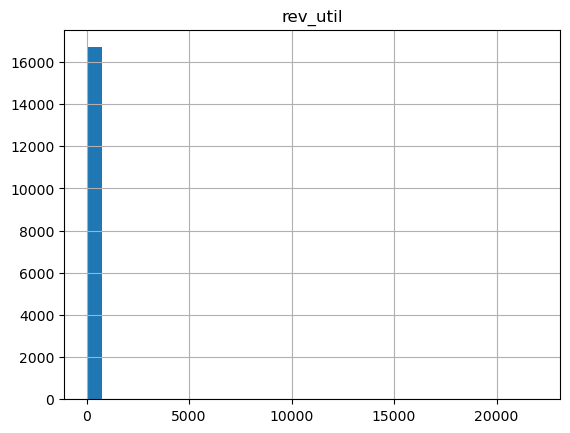

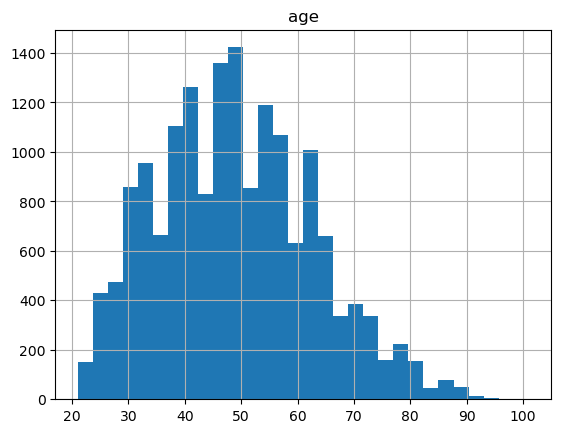

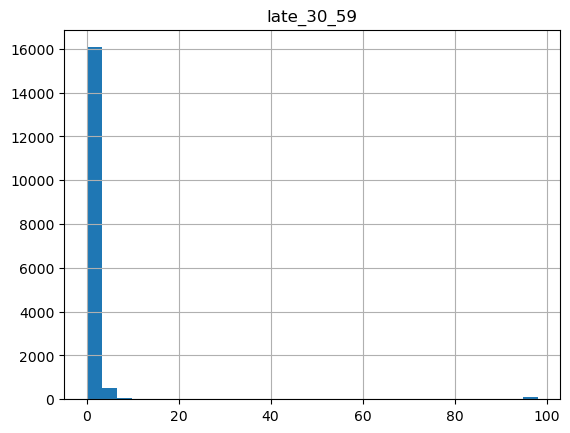

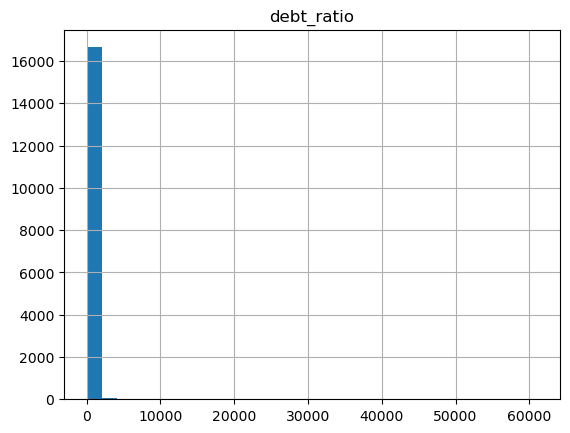

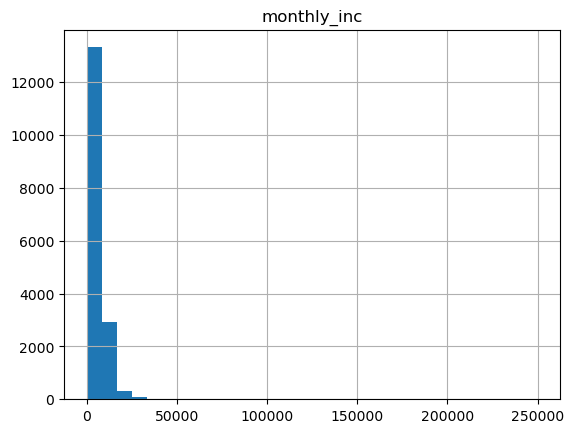

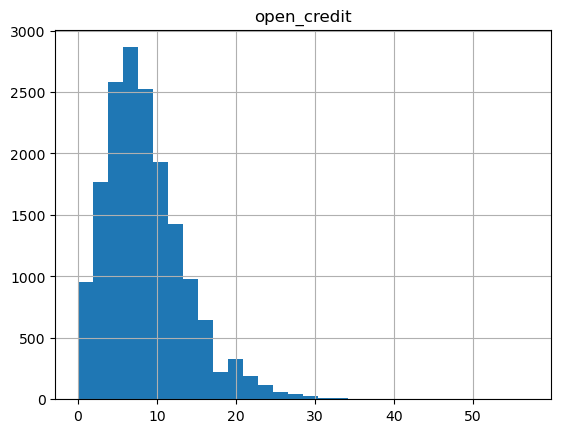

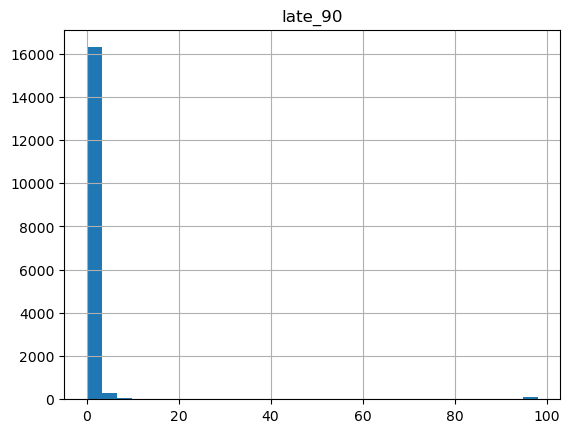

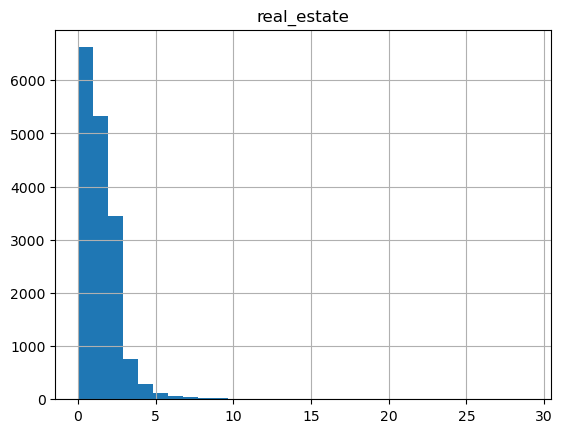

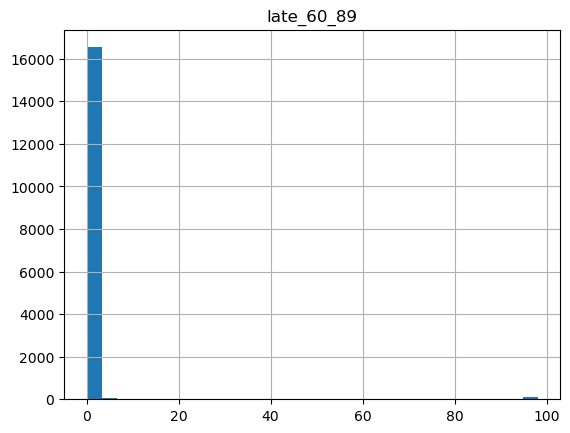

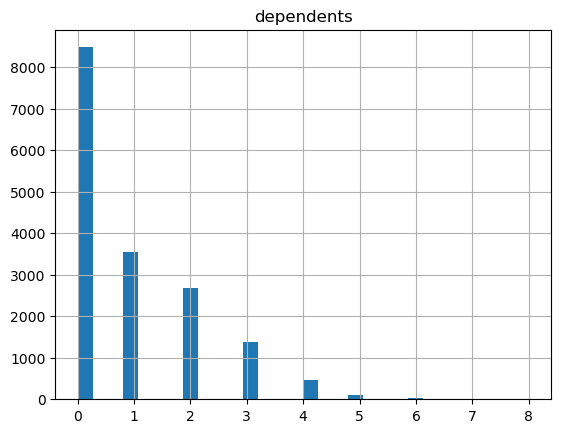

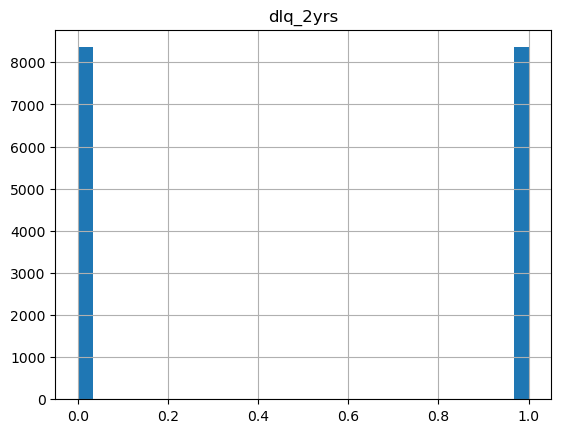

In [71]:
for column in dados_risk.columns:
    dados_risk.hist(column, bins = 30)

# Tratamento de Dados

In [78]:
#Escalonamento padrão apenas dos dados contínuos
x_esc = ColumnTransformer(transformers = [('num', StandardScaler(), [0, 3, 4])], 
                                              remainder = 'passthrough').fit_transform(x)

In [89]:
#Escalonamento de todos os dados
x_esc_inteiros = ColumnTransformer(transformers = [('num', StandardScaler(), [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])], 
                                              remainder = 'passthrough').fit_transform(x)

In [109]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x_esc_inteiros, y, random_state = 1, test_size = 0.2)

# SVC

In [107]:
svm = SVC()
svm.fit(x_treino, y_treino)

SVC()

In [108]:
accuracy_score(y_teste, svm.predict(x_teste))

0.5611725994615615

# Random Florest

In [103]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators = 500, 
                            max_samples = 100, bootstrap = True, n_jobs = 1)

In [104]:
bag_clf.fit(x_treino, y_treino)
y_pred = bag_clf.predict(x_teste)

In [105]:
accuracy_score(y_teste, y_pred)

0.7478312892611427